##All Libraries


In [6]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [7]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [8]:
import pandas as pd
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize


In [9]:
%pip install contractions

In [10]:
%pip install gensim

In [11]:
%pip install --upgrade --force-reinstall gensim

  Using cached gensim-4.3.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (8.1 kB)
  Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
  Using cached scipy-1.13.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (60 kB)
  Using cached smart_open-7.3.0.post1-py3-none-any.whl.metadata (24 kB)
  Using cached wrapt-1.17.3-cp311-cp311-manylinux1_x86_64.manylinux_2_28_x86_64.manylinux_2_5_x86_64.whl.metadata (6.4 kB)
Using cached gensim-4.3.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (26.7 MB)
Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.3 MB)
Using cached scipy-1.13.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (38.6 MB)
Using cached smart_open-7.3.0.post1-py3-none-any.whl (61 kB)
Using cached wrapt-1.17.3-cp311-cp311-manylinux1_x86_64.manylinux_2_28_x86_64.manylinux_2_5_x86_64.whl (82 kB)
  Attempting uninstall: wrapt
    F

In [55]:
import contractions

##Loading Data

In [56]:
reviews_data = pd.read_csv("a1_RestaurantReviews_HistoricDump.tsv", sep='\t')


In [57]:
reviews_data.head()


,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [58]:
reviews_data.shape


(900, 2)

##Expand Contractions


In [59]:
reviews_data['no_contractions'] = reviews_data['Review'].apply(lambda x: [contractions.fix(word) for word in x.split()])
reviews_data.head(7)

,Review,Liked,no_contractions
0,Wow... Loved this place.,1,"[Wow..., Loved, this, place.]"
1,Crust is not good.,0,"[Crust, is, not, good.]"
2,Not tasty and the texture was just nasty.,0,"[Not, tasty, and, the, texture, was, just, nas..."
3,Stopped by during the late May bank holiday of...,1,"[Stopped, by, during, the, late, May, bank, ho..."
4,The selection on the menu was great and so wer...,1,"[The, selection, on, the, menu, was, great, an..."
5,Now I am getting angry and I want my damn pho.,0,"[Now, I, am, getting, angry, and, I, want, my,..."
6,Honeslty it didn't taste THAT fresh.),0,"[Honeslty, it, did not, taste, THAT, fresh.)]"


This code  creates a new column called no_contractions in the reviews_data DataFrame. It does this by applying a function to each review in the Review column. The function uses a list comprehension to split each review into words and then applies the contractions.fix() function to each word to expand contractions (like "don't" to "do not"). Finally, it displays the first 7 rows of the DataFrame with the new column.



In [60]:
reviews_data['reviews_no_contractions'] = [' '.join(l) for l in reviews_data['no_contractions']]
reviews_data.head(7)

,Review,Liked,no_contractions,reviews_no_contractions
0,Wow... Loved this place.,1,"[Wow..., Loved, this, place.]",Wow... Loved this place.
1,Crust is not good.,0,"[Crust, is, not, good.]",Crust is not good.
2,Not tasty and the texture was just nasty.,0,"[Not, tasty, and, the, texture, was, just, nas...",Not tasty and the texture was just nasty.
3,Stopped by during the late May bank holiday of...,1,"[Stopped, by, during, the, late, May, bank, ho...",Stopped by during the late May bank holiday of...
4,The selection on the menu was great and so wer...,1,"[The, selection, on, the, menu, was, great, an...",The selection on the menu was great and so wer...
5,Now I am getting angry and I want my damn pho.,0,"[Now, I, am, getting, angry, and, I, want, my,...",Now I am getting angry and I want my damn pho.
6,Honeslty it didn't taste THAT fresh.),0,"[Honeslty, it, did not, taste, THAT, fresh.)]",Honeslty it did not taste THAT fresh.)


Takes the list of words from the no_contractions column and joins them back into a single string with spaces in between each word. This creates a new column called reviews_no_contractions in your DataFrame, which contains the reviews with contractions expanded. Finally, it displays the first 7 rows of the DataFrame, including the newly created column.



##Tokenize data


In [61]:
reviews_data['reviews_tokenized'] = reviews_data['reviews_no_contractions'].apply(word_tokenize)
reviews_data.head()

,Review,Liked,no_contractions,reviews_no_contractions,reviews_tokenized
0,Wow... Loved this place.,1,"[Wow..., Loved, this, place.]",Wow... Loved this place.,"[Wow, ..., Loved, this, place, .]"
1,Crust is not good.,0,"[Crust, is, not, good.]",Crust is not good.,"[Crust, is, not, good, .]"
2,Not tasty and the texture was just nasty.,0,"[Not, tasty, and, the, texture, was, just, nas...",Not tasty and the texture was just nasty.,"[Not, tasty, and, the, texture, was, just, nas..."
3,Stopped by during the late May bank holiday of...,1,"[Stopped, by, during, the, late, May, bank, ho...",Stopped by during the late May bank holiday of...,"[Stopped, by, during, the, late, May, bank, ho..."
4,The selection on the menu was great and so wer...,1,"[The, selection, on, the, menu, was, great, an...",The selection on the menu was great and so wer...,"[The, selection, on, the, menu, was, great, an..."


 the text in the reviews_no_contractions column of the reviews_data DataFrame using the word_tokenize function from the nltk library. Tokenization is the process of breaking down a piece of text into smaller units called tokens, which are typically words or punctuation marks. The resulting list of tokens for each review is stored in a new column called reviews_tokenized. Finally, the code displays the first few rows of the DataFrame, including the newly created reviews_tokenized column, so you can see the result of the tokenization.



## LowerCase

In [62]:
reviews_data['reviews_lower']= reviews_data['reviews_tokenized'].apply(lambda x: [word.lower() for word in x])
reviews_data.head()

,Review,Liked,no_contractions,reviews_no_contractions,reviews_tokenized,reviews_lower
0,Wow... Loved this place.,1,"[Wow..., Loved, this, place.]",Wow... Loved this place.,"[Wow, ..., Loved, this, place, .]","[wow, ..., loved, this, place, .]"
1,Crust is not good.,0,"[Crust, is, not, good.]",Crust is not good.,"[Crust, is, not, good, .]","[crust, is, not, good, .]"
2,Not tasty and the texture was just nasty.,0,"[Not, tasty, and, the, texture, was, just, nas...",Not tasty and the texture was just nasty.,"[Not, tasty, and, the, texture, was, just, nas...","[not, tasty, and, the, texture, was, just, nas..."
3,Stopped by during the late May bank holiday of...,1,"[Stopped, by, during, the, late, May, bank, ho...",Stopped by during the late May bank holiday of...,"[Stopped, by, during, the, late, May, bank, ho...","[stopped, by, during, the, late, may, bank, ho..."
4,The selection on the menu was great and so wer...,1,"[The, selection, on, the, menu, was, great, an...",The selection on the menu was great and so wer...,"[The, selection, on, the, menu, was, great, an...","[the, selection, on, the, menu, was, great, an..."


  takes the list of tokens in the reviews_tokenized column and converts each token to lowercase using a list comprehension. This creates a new column called reviews_lower in the DataFrame, which contains the lowercase version of the tokenized reviews. Finally, it displays the first few rows of the DataFrame, including the newly created

## Removing punctuations

In [63]:
punctuations = string.punctuation
reviews_data['reviews_no_punctuation'] = reviews_data['reviews_lower'].apply(lambda x: [word for word in x if word not in punctuations])
reviews_data.head()

,Review,Liked,no_contractions,reviews_no_contractions,reviews_tokenized,reviews_lower,reviews_no_punctuation
0,Wow... Loved this place.,1,"[Wow..., Loved, this, place.]",Wow... Loved this place.,"[Wow, ..., Loved, this, place, .]","[wow, ..., loved, this, place, .]","[wow, ..., loved, this, place]"
1,Crust is not good.,0,"[Crust, is, not, good.]",Crust is not good.,"[Crust, is, not, good, .]","[crust, is, not, good, .]","[crust, is, not, good]"
2,Not tasty and the texture was just nasty.,0,"[Not, tasty, and, the, texture, was, just, nas...",Not tasty and the texture was just nasty.,"[Not, tasty, and, the, texture, was, just, nas...","[not, tasty, and, the, texture, was, just, nas...","[not, tasty, and, the, texture, was, just, nasty]"
3,Stopped by during the late May bank holiday of...,1,"[Stopped, by, during, the, late, May, bank, ho...",Stopped by during the late May bank holiday of...,"[Stopped, by, during, the, late, May, bank, ho...","[stopped, by, during, the, late, may, bank, ho...","[stopped, by, during, the, late, may, bank, ho..."
4,The selection on the menu was great and so wer...,1,"[The, selection, on, the, menu, was, great, an...",The selection on the menu was great and so wer...,"[The, selection, on, the, menu, was, great, an...","[the, selection, on, the, menu, was, great, an...","[the, selection, on, the, menu, was, great, an..."


The code removes punctuation from the lowercase tokens in the reviews_lower column. It first defines a variable punctuations containing all punctuation characters using string.punctuation. Then, it applies a lambda function to each list of tokens in reviews_lower. This function uses a list comprehension to create a new list containing only the tokens that are not found in the punctuations string. The resulting list of tokens without punctuation is stored in a new column called reviews_no_punctuation. Finally, it displays the first few rows of the DataFrame, including the newly created column.

## Converting into Strings

In [64]:
reviews_data['reviews_cleaned'] = [' '.join(l) for l in reviews_data['reviews_no_punctuation']]
reviews_data.head()

,Review,Liked,no_contractions,reviews_no_contractions,reviews_tokenized,reviews_lower,reviews_no_punctuation,reviews_cleaned
0,Wow... Loved this place.,1,"[Wow..., Loved, this, place.]",Wow... Loved this place.,"[Wow, ..., Loved, this, place, .]","[wow, ..., loved, this, place, .]","[wow, ..., loved, this, place]",wow ... loved this place
1,Crust is not good.,0,"[Crust, is, not, good.]",Crust is not good.,"[Crust, is, not, good, .]","[crust, is, not, good, .]","[crust, is, not, good]",crust is not good
2,Not tasty and the texture was just nasty.,0,"[Not, tasty, and, the, texture, was, just, nas...",Not tasty and the texture was just nasty.,"[Not, tasty, and, the, texture, was, just, nas...","[not, tasty, and, the, texture, was, just, nas...","[not, tasty, and, the, texture, was, just, nasty]",not tasty and the texture was just nasty
3,Stopped by during the late May bank holiday of...,1,"[Stopped, by, during, the, late, May, bank, ho...",Stopped by during the late May bank holiday of...,"[Stopped, by, during, the, late, May, bank, ho...","[stopped, by, during, the, late, may, bank, ho...","[stopped, by, during, the, late, may, bank, ho...",stopped by during the late may bank holiday of...
4,The selection on the menu was great and so wer...,1,"[The, selection, on, the, menu, was, great, an...",The selection on the menu was great and so wer...,"[The, selection, on, the, menu, was, great, an...","[the, selection, on, the, menu, was, great, an...","[the, selection, on, the, menu, was, great, an...",the selection on the menu was great and so wer...


The  code takes the lists of tokens from the reviews_no_punctuation column and joins them back into single strings, with each token separated by a space. This creates a new column called reviews_cleaned in the DataFrame, which contains the cleaned reviews as strings. Finally, it displays the first few rows of the DataFrame, including the newly created column.



In [65]:
import os

if not os.path.exists('data'):
    os.makedirs('data')

In [66]:
reviews_data[['Review','Liked','reviews_cleaned']].to_csv('data/cleaned_reviews_data.csv',index = False)

saves a subset of the reviews_data DataFrame to a CSV file named cleaned_reviews_data.csv inside a directory called data. It only includes the original 'Review' and 'Liked' columns along with the newly created 'reviews_cleaned' column, excluding the index from the CSV file.

In [67]:
reviews_data = pd.read_csv("cleaned_reviews_lemmatized_data.csv")


In [68]:
reviews_data.head()

,Review,Liked,reviews_cleaned_lemmatized,reviews_cleaned
0,Wow... Loved this place.,1,wow ... love place,wow ... loved this place
1,Crust is not good.,0,crust good,crust is not good
2,Not tasty and the texture was just nasty.,0,tasty texture nasty,not tasty and the texture was just nasty
3,Stopped by during the late May bank holiday of...,1,stop late may bank holiday rick steve recommen...,stopped by during the late may bank holiday of...
4,The selection on the menu was great and so wer...,1,selection menu great price,the selection on the menu was great and so wer...


In [69]:
data = reviews_data['reviews_cleaned_lemmatized'].values.tolist()
all_reviews_words = list(data)
all_reviews_words[:1][0][:30]

'wow ... love place'

data = reviews_data['reviews_cleaned_lemmatized'].values.tolist(): This line selects the reviews_cleaned_lemmatized column from your reviews_data DataFrame, converts it into a list of values, and assigns it to the variable data. Each item in this list is a string representing a cleaned and lemmatized review.
all_reviews_words = list(data): This line simply converts the data list into another list called all_reviews_words. In this case, it essentially creates a copy of the data list.
all_reviews_words[:1][0][:30]: This line accesses and displays a small portion of the first element in the all_reviews_words list.
all_reviews_words[:1] takes the first element of the list (which is the first review string).
[0] then accesses that first element (the string).
[:30] takes the first 30 characters of that string.
In essence, this code is taking the cleaned and lemmatized review text, putting it into a list format, and then showing you the beginning of the very first review in that list as a quick check.

##Create dictionary and corpus to prepare data for LDA


In [70]:
from gensim import corpora

# Split the strings in all_reviews_words into lists of words
all_reviews_words_split = [review.split() for review in all_reviews_words]

dictionary = corpora.Dictionary(all_reviews_words_split)
corpus = [dictionary.doc2bow(words) for words in all_reviews_words_split]
# View
print(corpus[:1]) # Printing the entire first document-term vector for better context

[[(0, 1), (1, 1), (2, 1), (3, 1)]]


from gensim import corpora: This line imports the corpora module from the gensim library, which provides functionalities for creating and managing corpora and dictionaries.
all_reviews_words_split = [review.split() for review in all_reviews_words]: This line takes the all_reviews_words list, which contains each review as a single string, and splits each string into a list of individual words. This is done using a list comprehension and the .split() method, which splits a string by whitespace by default. The result is a list of lists, where each inner list contains the words of a single review.
dictionary = corpora.Dictionary(all_reviews_words_split): This line creates a Dictionary object from the all_reviews_words_split. The gensim Dictionary maps each unique word in your corpus to a unique integer ID. This is a crucial step for converting text data into a numerical format that can be used by topic modeling algorithms.
corpus = [dictionary.doc2bow(words) for words in all_reviews_words_split]: This line creates a bag-of-words representation of your corpus. It iterates through each list of words in all_reviews_words_split and uses the dictionary.doc2bow() method to convert it into a "bag-of-words" format. The doc2bow() method counts the occurrences of each word in the document and returns a list of tuples, where each tuple is (word_id, word_count). This is the numerical representation of your documents.
print(corpus[:1]): This line prints the bag-of-words representation of the first document in your corpus. This allows you to see the output of the doc2bow() conversion for a single document.
In summary, this code transforms your list of review strings into a dictionary mapping words to IDs and a corpus represented as a list of bag-of-words vectors, which are necessary inputs for many topic modeling algorithms.



##Check for the optimal number of topics


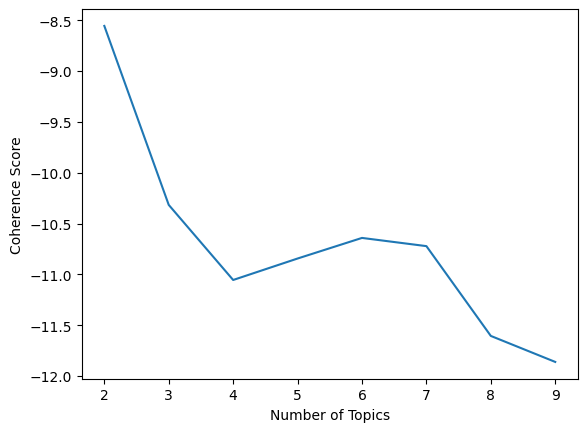

In [71]:
import gensim
from gensim.models.coherencemodel import CoherenceModel
import matplotlib.pyplot as plt

review_topics_um = []
coherence_scores_um = []
for i in range(2,10,1):
    lda_model_um = gensim.models.LdaMulticore(corpus=corpus, id2word=dictionary,num_topics = i ,random_state=1)
    coherence_um = CoherenceModel(model=lda_model_um, corpus=corpus, dictionary=dictionary, coherence='u_mass')
    review_topics_um.append(i)
    coherence_scores_um.append(coherence_um.get_coherence())
plt.plot(review_topics_um, coherence_scores_um)
plt.xlabel('Number of Topics')
plt.ylabel('Coherence Score')
plt.show()

corpus → your text in numbers form (bag-of-words).

id2word → maps word IDs to actual words.

num_topics → how many topics to find.

CoherenceModel()

Checks how good the topics are.

Important parts:

model → the LDA model you just made.

coherence='u_mass' → type of quality score (higher = better).

.get_coherence()

Actually returns the score for topic quality as a number.

plt.plot()

Draws a line graph of your scores.

This code tests different numbers of topics in LDA, calculates how good they are using u_mass coherence, and plots the results so you can choose the best number.

Based on the plot, you're looking for the number of topics where the coherence score is highest. In this case, the highest point on the graph appears to be at 2 topics, with a coherence score around -8.5. As the number of topics increases, the coherence score generally decreases. This suggests that 2 topics might be the optimal number according to the u_mass coherence measure for this dataset and model configuration.



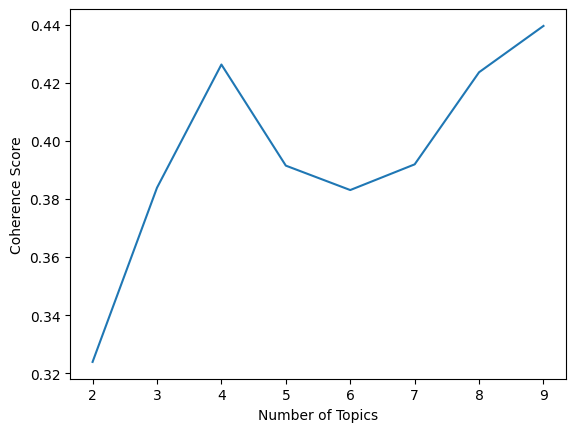

In [29]:
review_topics_cv = []
coherence_scores_cv = []
for i in range(2,10,1):
    lda_model_cv = gensim.models.LdaMulticore(corpus=corpus, id2word=dictionary, num_topics=i, random_state=1)
    coherence_cv = CoherenceModel(model=lda_model_cv, texts = reviews_data['reviews_cleaned_lemmatized'].apply(lambda x: x.split()).tolist(), corpus=corpus, dictionary=dictionary, coherence='c_v')
    review_topics_cv.append(i)
    coherence_scores_cv.append(coherence_cv.get_coherence())
plt.plot(review_topics_cv, coherence_scores_cv)
plt.xlabel('Number of Topics')
plt.ylabel('Coherence Score')
plt.show()

The only real difference from previous code is:

Before we used u_mass coherence (good for quick comparison, but more mathematical).

Now we are using c_v coherence (more interpretable and often matches human judgment).

Based on the plot, you're looking for the number of topics where the coherence score is highest. In this case, the highest point on the graph appears to be at 4 topics, with a coherence score around 0.42. There is another peak at 9 topics with a coherence score around 0.44. Considering the trade-off between the number of topics and coherence, 4 or 9 topics could be considered optimal based on the c_v coherence measure.

In [30]:
topics_range = range(2,10,1)
max_index = coherence_scores_cv.index(max(coherence_scores_cv))
optimal_num_topics = topics_range[max_index]
print("Optimal topics: ",optimal_num_topics)


Optimal topics:  9


 This code finds the peak in the coherence score plot we generated and tells us which number of topics corresponds to that peak, suggesting the most coherent number of topics according to the c_v measure.

##Tokenize Data

In [31]:
reviews_data['reviews_tokenized'] = reviews_data['reviews_cleaned'].apply(word_tokenize)

The result is that the new reviews_tokenized column contains a list of tokens for each review, which is the output of the tokenization process. This is a crucial step in preparing text data for analysis, such as topic modeling.

##Visualise most common words


In [32]:
def combine_words(word_list):
    all_words = []
    for word in word_list:
        all_words += word
    return all_words

This function is a utility to take a collection of word lists (like the tokenized reviews for multiple documents) and create one large list containing every single word from all those documents.

In [33]:
def count_topwords(all_words):
    counts = dict()
    for word in all_words:
        if word in counts:
            counts[word] += 1
        else:
            counts[word] = 1

    word_count = pd.DataFrame([counts])
    word_count_transposed = word_count.T.reset_index()
    word_count_transposed.columns = ['words','word_count']
    word_count_sorted = word_count_transposed.sort_values("word_count",ascending = False)
    word_count_sorted
    return word_count_sorted[:20]

This function is designed to take a collection of words, count how many times each word appears, and then present the top 20 most frequent words in a structured pandas DataFrame.



In [34]:
reviews = reviews_data['reviews_tokenized']
reviews_words =  combine_words(reviews)
reviews_words[:10]

['wow', '...', 'loved', 'this', 'place', 'crust', 'is', 'not', 'good', 'not']

applies the combine_words function to your tokenized reviews to create a single list of all words across all reviews and then displays the first 10 words from this combined list.

In [35]:
reviews_topword_count = count_topwords(reviews_words)
reviews_topword_count.head()

,words,word_count
11,the,517
10,and,360
36,i,310
13,was,267
66,a,208


<Axes: xlabel='words', ylabel='word_count'>

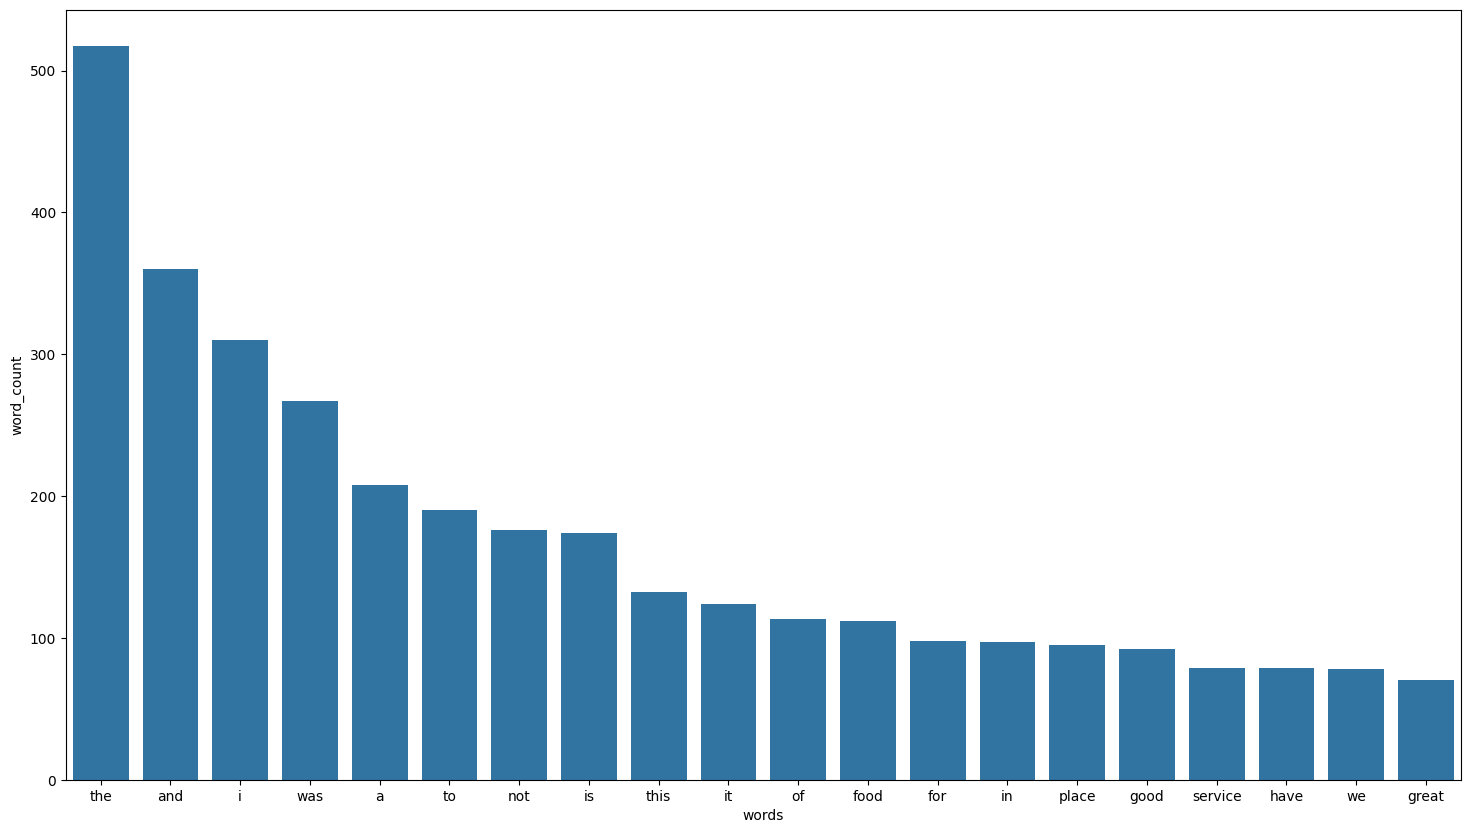

In [36]:
import seaborn as sns

plt.figure(figsize= (18,10))

sns.barplot(data = reviews_topword_count ,x= reviews_topword_count['words'], y= reviews_topword_count['word_count'] )

This code uses seaborn to create a visually appealing bar chart showing the top 20 words from your reviews and how many times each word appears, allowing you to quickly see the most common terms in your dataset.

In [37]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [38]:
stop_words = set(stopwords.words('english'))
reviews_data['reviews_no_stopwords'] = reviews_data['reviews_tokenized'].apply(lambda x: [word for word in x if word not in stop_words])
reviews_data.head()

,Review,Liked,reviews_cleaned_lemmatized,reviews_cleaned,reviews_tokenized,reviews_no_stopwords
0,Wow... Loved this place.,1,wow ... love place,wow ... loved this place,"[wow, ..., loved, this, place]","[wow, ..., loved, place]"
1,Crust is not good.,0,crust good,crust is not good,"[crust, is, not, good]","[crust, good]"
2,Not tasty and the texture was just nasty.,0,tasty texture nasty,not tasty and the texture was just nasty,"[not, tasty, and, the, texture, was, just, nasty]","[tasty, texture, nasty]"
3,Stopped by during the late May bank holiday of...,1,stop late may bank holiday rick steve recommen...,stopped by during the late may bank holiday of...,"[stopped, by, during, the, late, may, bank, ho...","[stopped, late, may, bank, holiday, rick, stev..."
4,The selection on the menu was great and so wer...,1,selection menu great price,the selection on the menu was great and so wer...,"[the, selection, on, the, menu, was, great, an...","[selection, menu, great, prices]"


stop_words = set(stopwords.words('english'))

Loads a list of common English stopwords (like the, is, and) and turns it into a set for faster checking.

.apply(lambda x: [word for word in x if word not in stop_words])

Goes through each tokenized review (x).

Keeps only the words not in stop_words.

reviews_data['reviews_no_stopwords'] = ...

Saves the cleaned list of words into a new column called reviews_no_stopwords.

 This code removes common English stop words from your tokenized reviews, creating a cleaner version of your text data that is often more suitable for further analysis like topic modeling or sentiment analysis.

In [39]:
reviews_data['reviews_cleaned_stopwords'] = [' '.join(l) for l in reviews_data['reviews_no_stopwords']]
reviews_data.head()

,Review,Liked,reviews_cleaned_lemmatized,reviews_cleaned,reviews_tokenized,reviews_no_stopwords,reviews_cleaned_stopwords
0,Wow... Loved this place.,1,wow ... love place,wow ... loved this place,"[wow, ..., loved, this, place]","[wow, ..., loved, place]",wow ... loved place
1,Crust is not good.,0,crust good,crust is not good,"[crust, is, not, good]","[crust, good]",crust good
2,Not tasty and the texture was just nasty.,0,tasty texture nasty,not tasty and the texture was just nasty,"[not, tasty, and, the, texture, was, just, nasty]","[tasty, texture, nasty]",tasty texture nasty
3,Stopped by during the late May bank holiday of...,1,stop late may bank holiday rick steve recommen...,stopped by during the late may bank holiday of...,"[stopped, by, during, the, late, may, bank, ho...","[stopped, late, may, bank, holiday, rick, stev...",stopped late may bank holiday rick steve recom...
4,The selection on the menu was great and so wer...,1,selection menu great price,the selection on the menu was great and so wer...,"[the, selection, on, the, menu, was, great, an...","[selection, menu, great, prices]",selection menu great prices


`[' '.join(l) for l in reviews_data['reviews_no_stopwords']]`

For each list l of words in reviews_no_stopwords,

Joins them back into a single string with spaces in between.
`reviews_data['reviews_cleaned_stopwords'] = ...`

Saves these joined strings into a new column called reviews_cleaned_stopwords.

`reviews_data.head()`

Shows the first 5 rows so you can check your new column.

In [40]:
reviews_no_stopwords = reviews_data['reviews_no_stopwords']
reviews_words =  combine_words(reviews_no_stopwords)
reviews_words[:10]

['wow',
 '...',
 'loved',
 'place',
 'crust',
 'good',
 'tasty',
 'texture',
 'nasty',
 'stopped']

In [41]:
reviews_topword_count = count_topwords(reviews_words)
reviews_topword_count.head()

,words,word_count
81,food,112
3,place,95
5,good,92
41,service,79
19,great,70


This code counts the frequency of each word in your reviews after stop words have been removed and then displays the top 20 most frequent words.

<Axes: xlabel='words', ylabel='word_count'>

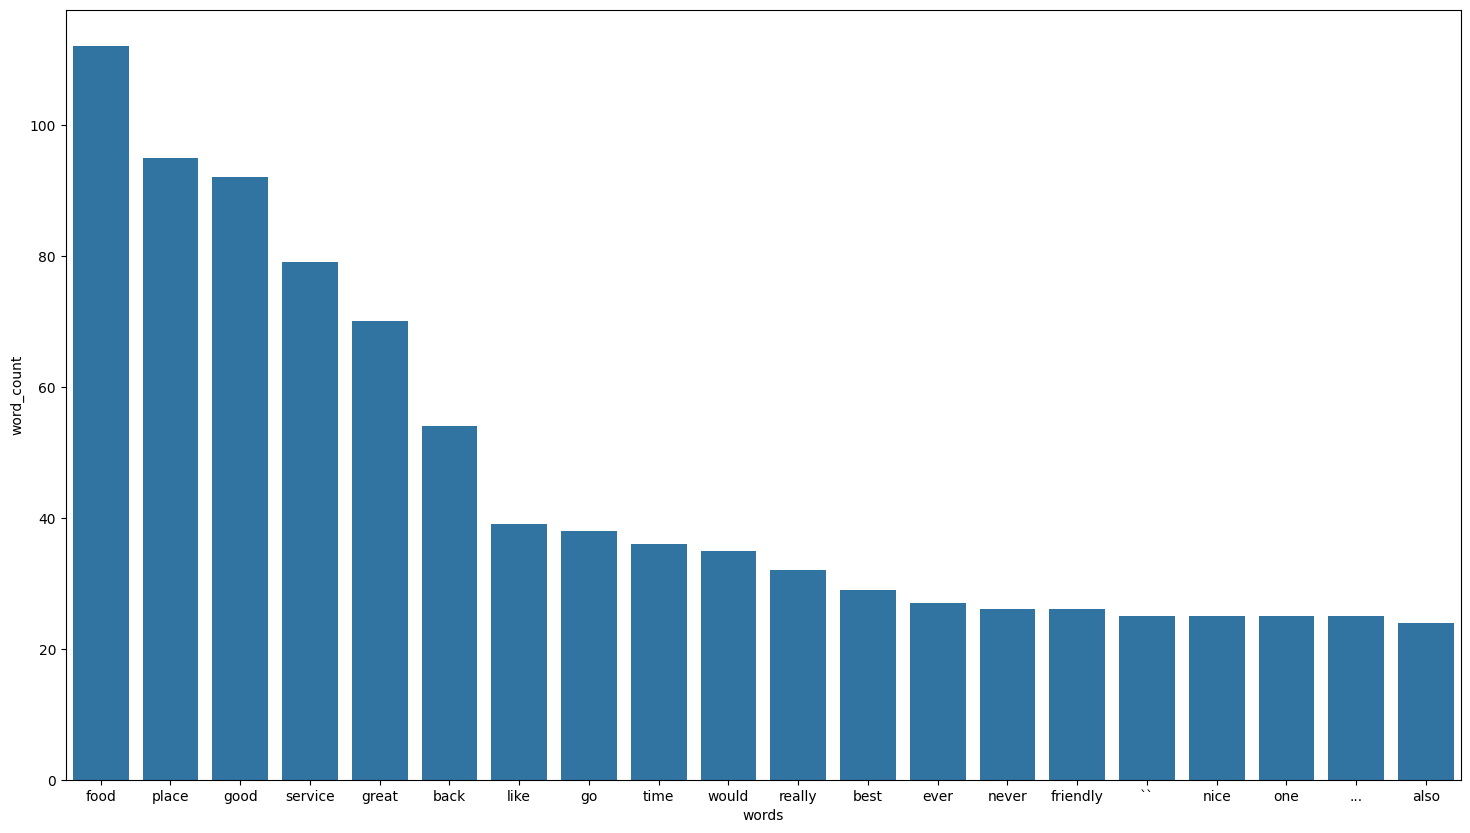

In [42]:
plt.figure(figsize= (18,10))

sns.barplot(data = reviews_topword_count ,x= reviews_topword_count['words'], y= reviews_topword_count['word_count'] )

This plot is similar to the previous one, but because stop words have been removed, the words displayed are more likely to be relevant to the content and topics of the reviews (e.g., "food", "place", "service") rather than common grammatical words.



In [43]:
reviews_data[['Review','Liked',"reviews_cleaned",'reviews_cleaned_stopwords']].to_csv("data/cleaned_reviews_no_stopwords_data.csv",index = False)

reviews_data[['Review','Liked',"reviews_cleaned",'reviews_cleaned_stopwords']]

Picks only these 4 columns from reviews_data.

.to_csv("data/cleaned_reviews_no_stopwords_data.csv", index=False)

Saves them as a CSV file in the data folder.

index=False → doesn’t save the row numbers.

In [44]:
reviews_data = pd.read_csv("cleaned_reviews_no_stopwords_data.csv")

In [45]:
reviews_data.head()

,Review,Liked,reviews_cleaned,reviews_cleaned_stopwords
0,Wow... Loved this place.,1,wow ... loved this place,wow ... loved place
1,Crust is not good.,0,crust is not good,crust good
2,Not tasty and the texture was just nasty.,0,not tasty and the texture was just nasty,tasty texture nasty
3,Stopped by during the late May bank holiday of...,1,stopped by during the late may bank holiday of...,stopped late may bank holiday rick steve recom...
4,The selection on the menu was great and so wer...,1,the selection on the menu was great and so wer...,selection menu great prices


In [46]:
reviews_data = reviews_data.dropna()


In [47]:
reviews_data['reviews_tokenized'] = reviews_data['reviews_cleaned_stopwords'].apply(word_tokenize)


##N-grams

In [48]:
def extract_ngrams(tokenized_data,n):
    ngrams_list = list(nltk.ngrams(tokenized_data, n))
    ngrams_str = [' '.join(grams) for grams in ngrams_list]
    return ngrams_str

def extract_ngrams(tokenized_data, n):

Makes a function that takes:

tokenized_data → a list of words.

n → size of the n-gram (2 for bigrams, 3 for trigrams, etc.).

nltk.ngrams(tokenized_data, n)

Creates groups of n consecutive words.

Example: ["i","love","python"], with n=2 → [("i","love"), ("love","python")].

[' '.join(grams) for grams in ngrams_list]

Joins each group into a string.

Example: [("i","love"), ("love","python")] → ["i love", "love python"].

return ngrams_str

Gives back the list of n-grams as strings.



This function extract_ngrams takes a list of tokens and an integer n as input. It then generates n-grams from the tokenized data and joins each n-gram into a single string. Finally, it returns a list of these n-gram strings.



In [49]:
reviews_data['reviews_ngrams'] = reviews_data['reviews_tokenized'].apply(lambda x: extract_ngrams(x, 2))
reviews_data.head()

,Review,Liked,reviews_cleaned,reviews_cleaned_stopwords,reviews_tokenized,reviews_ngrams
0,Wow... Loved this place.,1,wow ... loved this place,wow ... loved place,"[wow, ..., loved, place]","[wow ..., ... loved, loved place]"
1,Crust is not good.,0,crust is not good,crust good,"[crust, good]",[crust good]
2,Not tasty and the texture was just nasty.,0,not tasty and the texture was just nasty,tasty texture nasty,"[tasty, texture, nasty]","[tasty texture, texture nasty]"
3,Stopped by during the late May bank holiday of...,1,stopped by during the late may bank holiday of...,stopped late may bank holiday rick steve recom...,"[stopped, late, may, bank, holiday, rick, stev...","[stopped late, late may, may bank, bank holida..."
4,The selection on the menu was great and so wer...,1,the selection on the menu was great and so wer...,selection menu great prices,"[selection, menu, great, prices]","[selection menu, menu great, great prices]"


This code applies the extract_ngrams function to the reviews_tokenized column of your DataFrame. It specifically extracts bigrams (n=2) from each list of tokens in that column. The resulting list of bigram strings for each review is then stored in a new column called reviews_ngrams. Finally, it displays the first few rows of the DataFrame, including the newly created reviews_ngrams column, so you can see the bigrams for each review.

In [50]:
reviews = reviews_data['reviews_ngrams']
reviews_words =  combine_words(reviews)
reviews_words[:10]

['wow ...',
 '... loved',
 'loved place',
 'crust good',
 'tasty texture',
 'texture nasty',
 'stopped late',
 'late may',
 'may bank',
 'bank holiday']

In [51]:
reviews_topword_count = count_topwords(reviews_words)
reviews_topword_count.head()

,words,word_count
36,go back,15
366,good food,8
244,great food,8
1475,food good,7
326,really good,6


<Axes: xlabel='words', ylabel='word_count'>

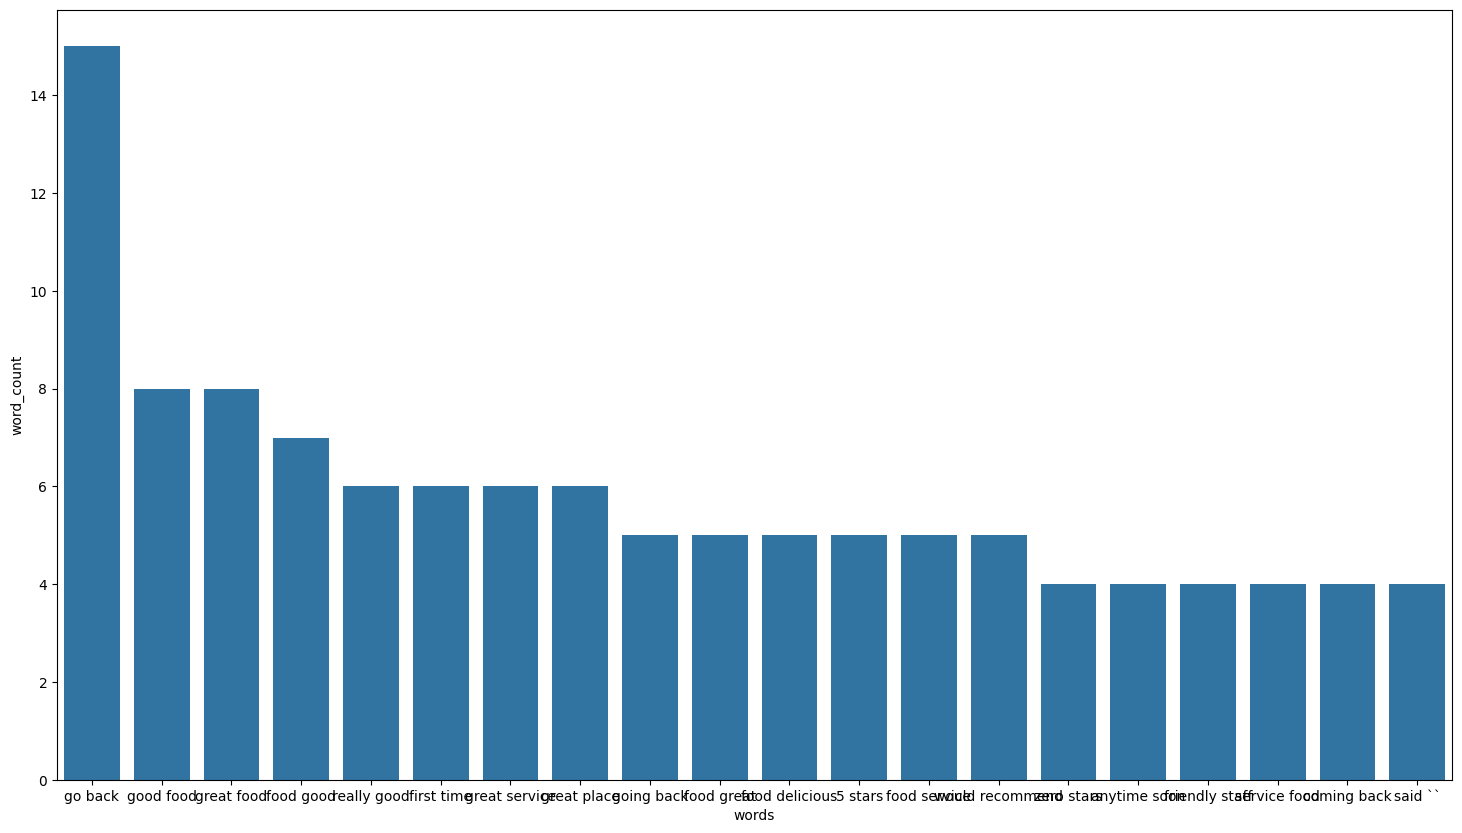

In [52]:
plt.figure(figsize= (18,10))

sns.barplot(data = reviews_topword_count ,x= reviews_topword_count['words'], y= reviews_topword_count['word_count'] )


showing the top 20 bigrams from your reviews and how many times each bigram appears, allowing you to quickly see the most common pairs of words in your dataset after removing stopwords.

In [53]:
reviews = reviews_data['reviews_tokenized']
reviews_words =  combine_words(reviews)
reviews_words[:10]

['wow',
 '...',
 'loved',
 'place',
 'crust',
 'good',
 'tasty',
 'texture',
 'nasty',
 'stopped']

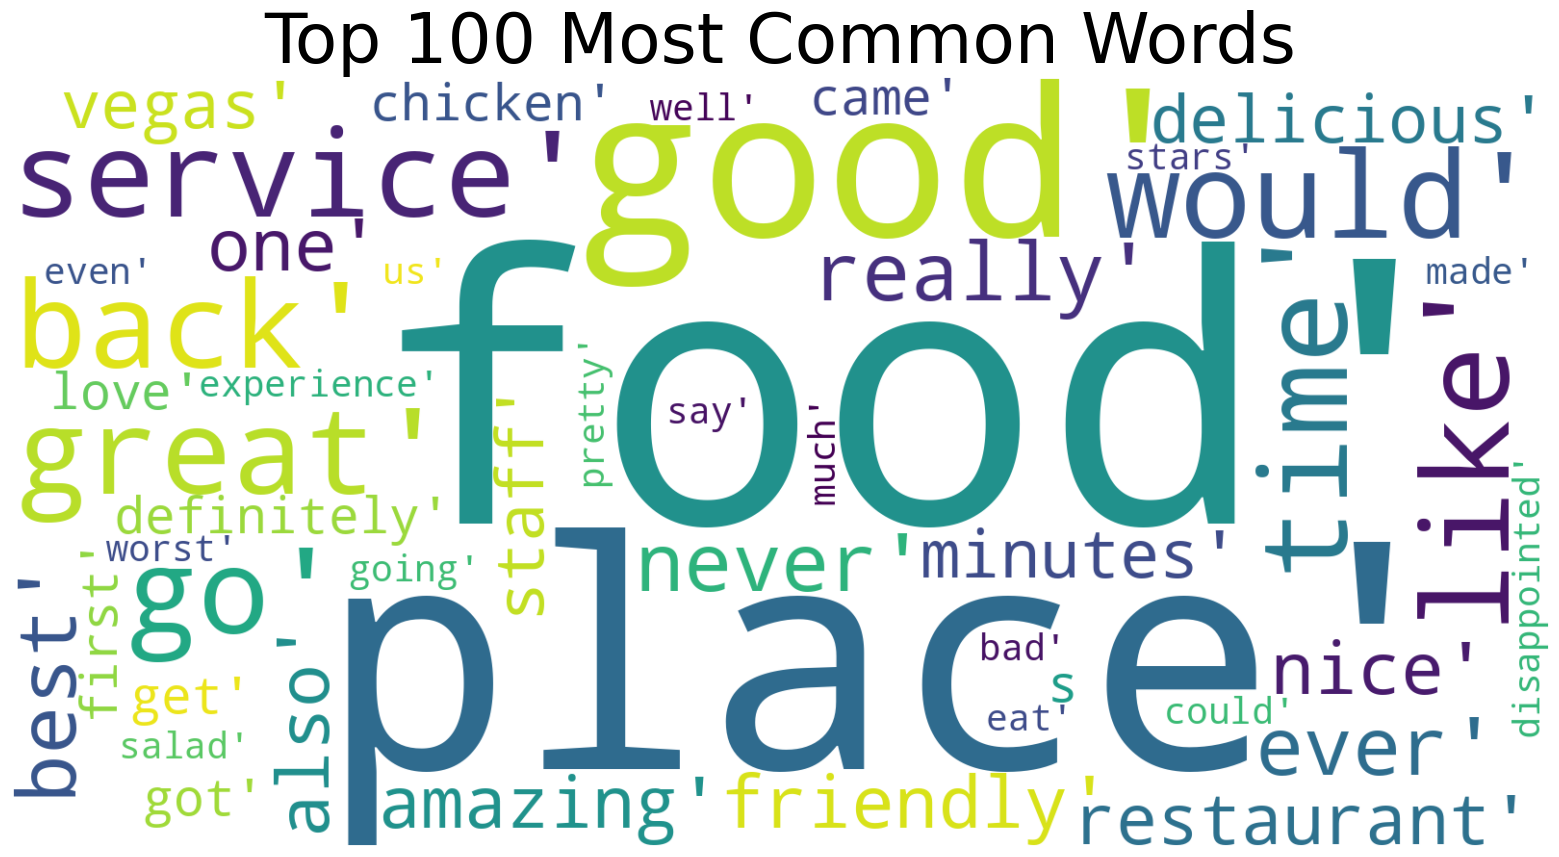

In [54]:
from nltk.probability import FreqDist
from wordcloud import WordCloud
import matplotlib.pyplot as plt

mostcommon = FreqDist(reviews_words).most_common(50)
wordcloud = WordCloud(width=1600, height=800, background_color='white').generate(str(mostcommon))
fig = plt.figure(figsize=(30,10), facecolor='white')
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('Top 100 Most Common Words', fontsize=50)
plt.show()

This code creates a visual representation (a word cloud) of the most frequently occurring words in your cleaned review data.

## Perform TF-IDF

In [73]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfIdfVectorizer=TfidfVectorizer(use_idf = True)
tfIdf = tfIdfVectorizer.fit_transform(reviews_data['reviews_cleaned_lemmatized'])
tfIdf_output = pd.DataFrame(tfIdf.toarray(),columns=tfIdfVectorizer.get_feature_names_out())
tfIdf_output.head(10)

,00,10,100,12,15,17,1979,20,2007,23,...,year,yellow,yellowtail,yelpers,yet,yucky,yukon,yum,yummy,zero
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Creates a TF-IDF vectorizer.

use_idf=True → uses Inverse Document Frequency (words that appear everywhere get lower weight, rare words get higher weight).

Learns the vocabulary from your cleaned reviews.

Transforms the text into a matrix of numbers (each row = a review, each column = a word).

Converts the matrix into a DataFrame so you can see it easily.

Rows = reviews, Columns = words, Values = TF-IDF scores.

This displays the first 10 rows of the resulting DataFrame, showing the TF-IDF scores for the first 10 reviews across all the words in your vocabulary. Each row represents a review, and each column represents a word. The values in the cells are the TF-IDF scores, indicating the importance of that word in that specific review relative to the entire set of reviews.


In [74]:
tfIdf_total = tfIdf_output.T.sum(axis=1)
tfIdf_total.sort_values(ascending = False)

,0
food,30.857469
good,29.941739
place,27.339000
service,27.164228
great,23.934017
...,...
deep,0.252433
gloves,0.252433
temp,0.252433
eel,0.210356


tfIdf_output.T: This transposes the tfIdf_output DataFrame. The original DataFrame has reviews as rows and words as columns. Transposing it makes words the rows and reviews the columns.

.sum(axis=1): This calculates the sum across the rows (axis=1). Since the DataFrame is transposed, summing across rows means summing the TF-IDF scores for each word across all the reviews. The result is a pandas Series where the index is the word and the value is the sum of its TF-IDF scores.

tfIdf_total.sort_values(ascending = False): This sorts the tfIdf_total Series in descending order based on the sum of TF-IDF scores. This allows you to see which words have the highest total TF-IDF scores across the entire dataset, indicating their overall importance.

this code identifies the words that are most significant in the entire collection of reviews, considering both how often they appear in individual reviews and how rare they are across all reviews.



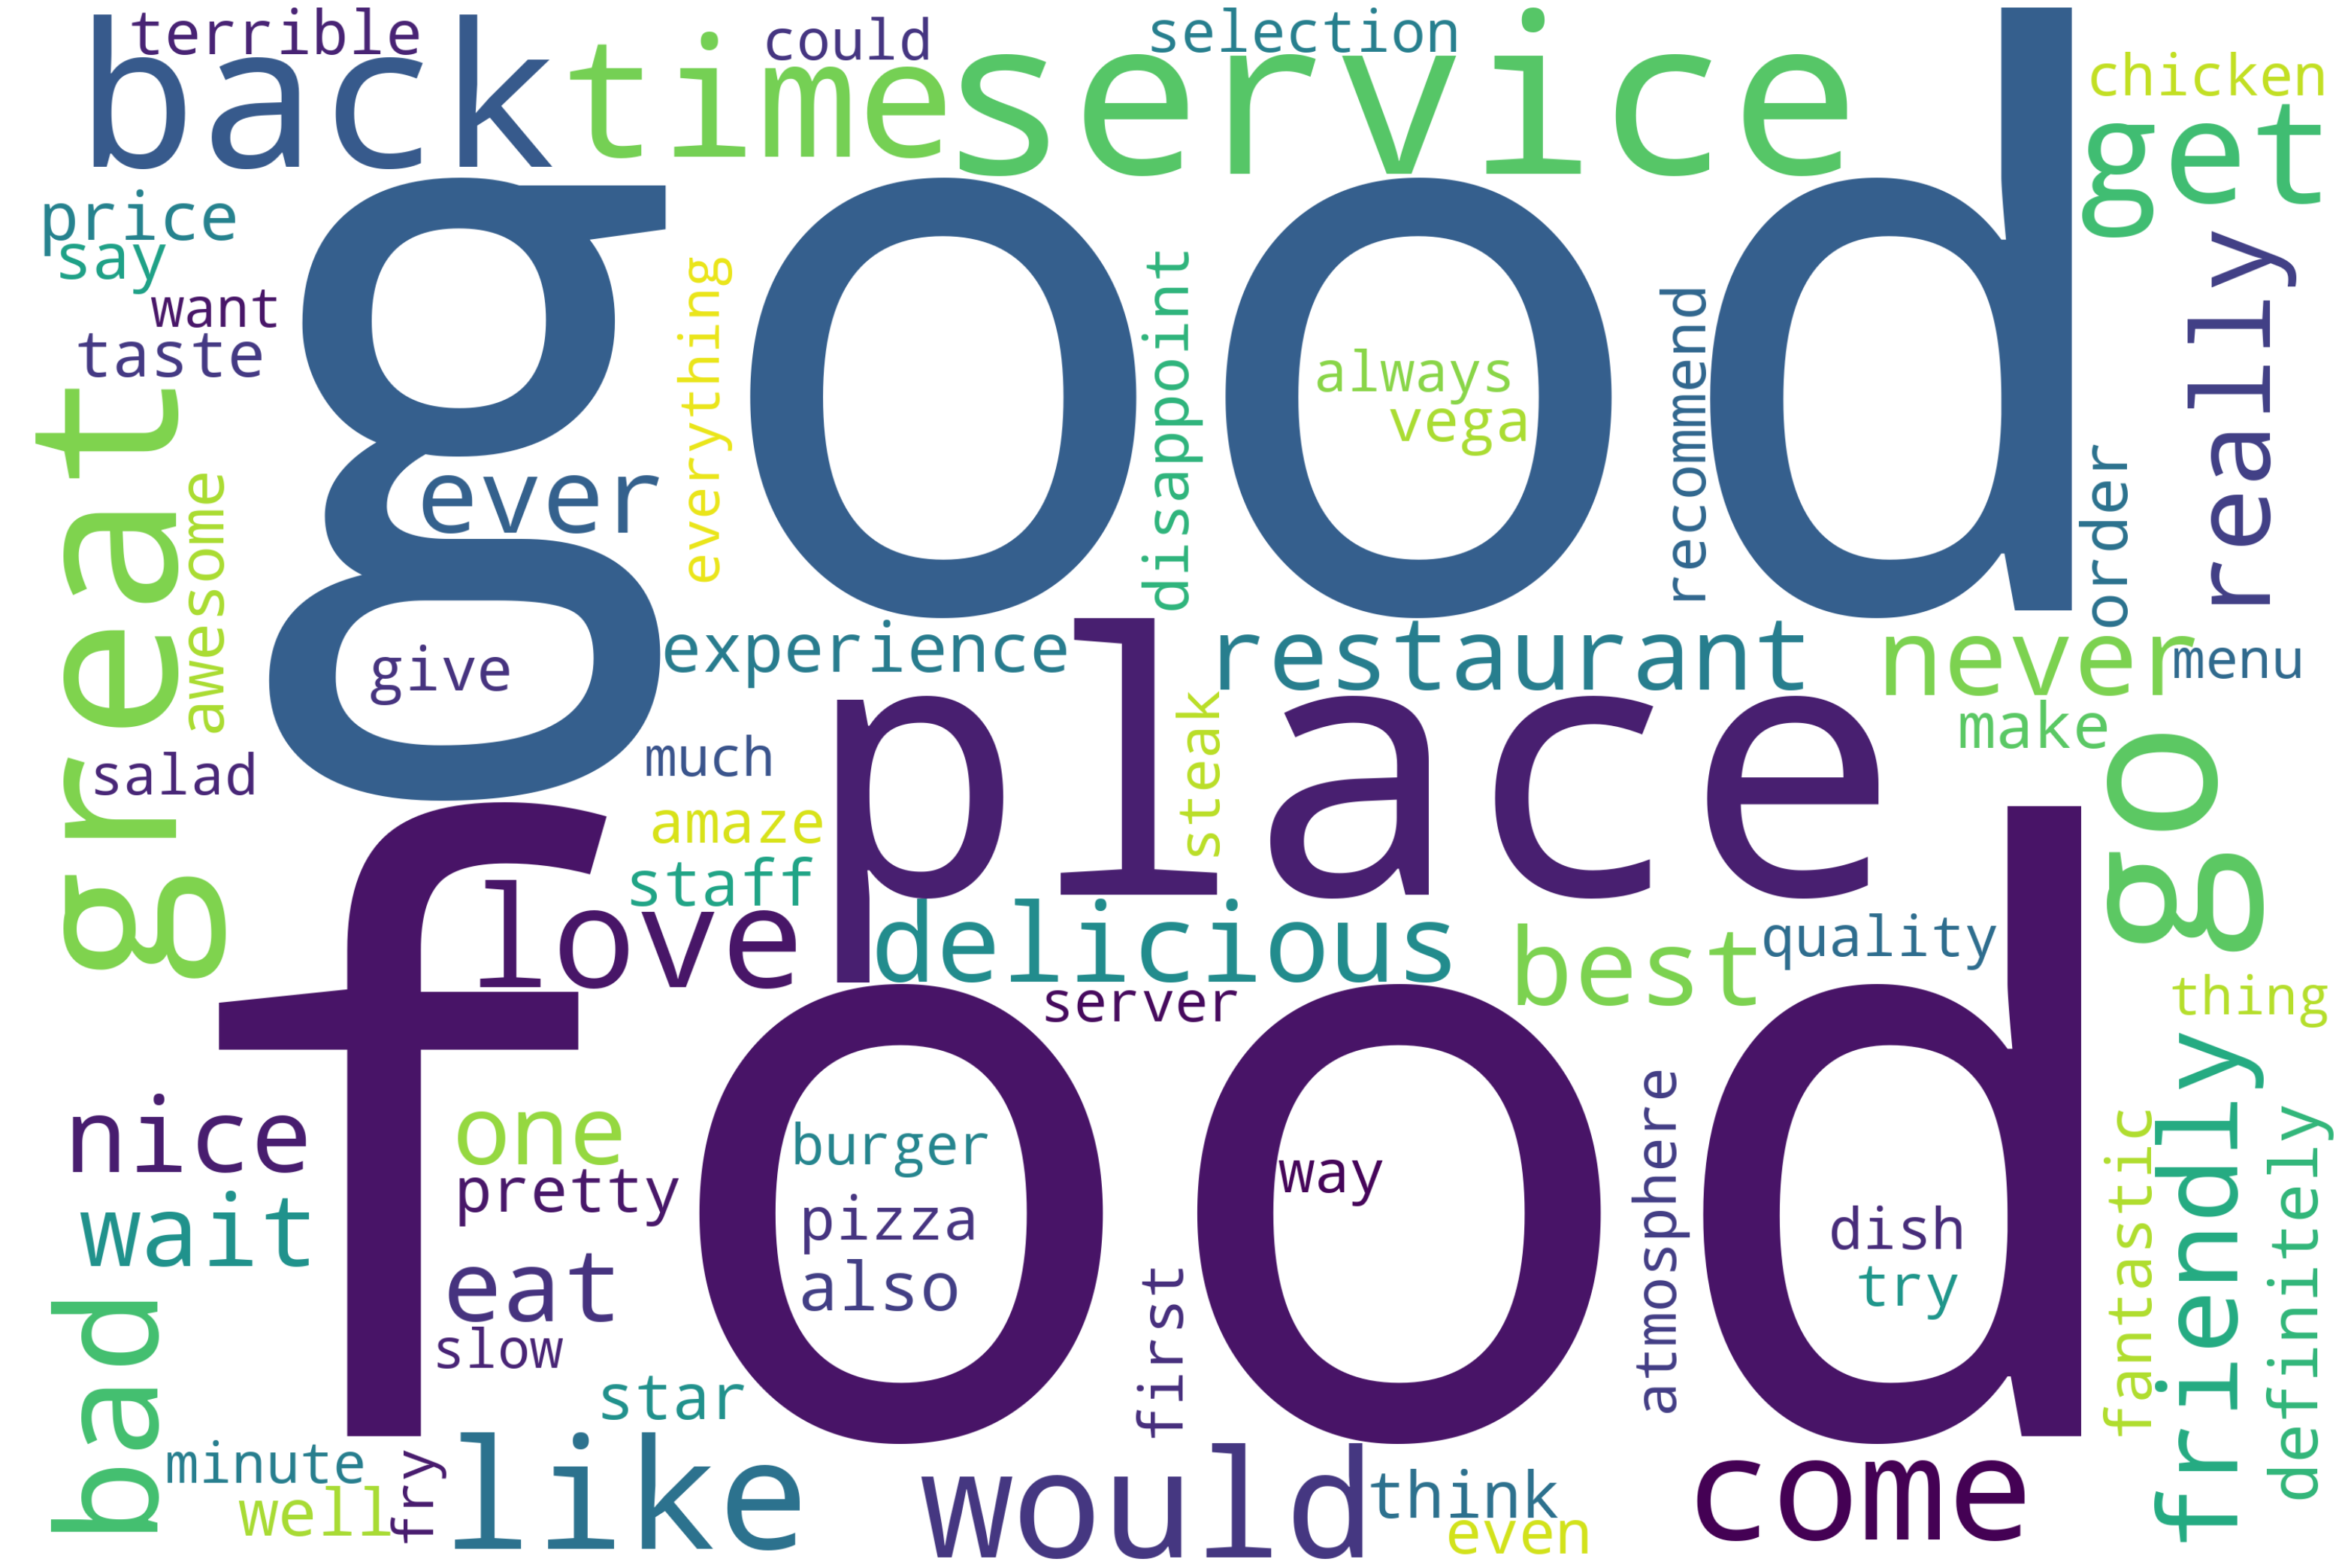

In [75]:
wordcloud = WordCloud(width = 3000, height = 2000,background_color='white',max_words=70)
wordcloud.generate_from_frequencies(tfIdf_total)
plt.figure(figsize=(40, 30))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [80]:
reviews_data = pd.read_csv("cleaned_reviews_lemmatized_data.csv")


In [81]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sentimentanalyzer = SentimentIntensityAnalyzer()
reviews_data['sentiment_scores'] = reviews_data['reviews_cleaned'].apply(lambda x: sentimentanalyzer.polarity_scores(x))

reviews_data.head()

LookupError: 
**********************************************************************
  Resource [93mvader_lexicon[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('vader_lexicon')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93msentiment/vader_lexicon.zip/vader_lexicon/vader_lexicon.txt[0m

  Searched in:
    - '/root/nltk_data'
    - '/usr/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
    - ''
**********************************************************************


In [82]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [83]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sentimentanalyzer = SentimentIntensityAnalyzer()
reviews_data['sentiment_scores'] = reviews_data['reviews_cleaned'].apply(lambda x: sentimentanalyzer.polarity_scores(x))

reviews_data.head()

,Review,Liked,reviews_cleaned_lemmatized,reviews_cleaned,sentiment_scores
0,Wow... Loved this place.,1,wow ... love place,wow ... loved this place,"{'neg': 0.0, 'neu': 0.28, 'pos': 0.72, 'compou..."
1,Crust is not good.,0,crust good,crust is not good,"{'neg': 0.445, 'neu': 0.555, 'pos': 0.0, 'comp..."
2,Not tasty and the texture was just nasty.,0,tasty texture nasty,not tasty and the texture was just nasty,"{'neg': 0.34, 'neu': 0.66, 'pos': 0.0, 'compou..."
3,Stopped by during the late May bank holiday of...,1,stop late may bank holiday rick steve recommen...,stopped by during the late may bank holiday of...,"{'neg': 0.093, 'neu': 0.585, 'pos': 0.322, 'co..."
4,The selection on the menu was great and so wer...,1,selection menu great price,the selection on the menu was great and so wer...,"{'neg': 0.0, 'neu': 0.728, 'pos': 0.272, 'comp..."


from nltk.sentiment.vader import SentimentIntensityAnalyzer

Imports VADER, a pre-trained sentiment analyzer good for short texts like reviews.

sentimentanalyzer = SentimentIntensityAnalyzer()

Creates a sentiment analyzer object.

.polarity_scores(x)

Takes a piece of text x and gives back a dictionary of scores:

neg → how negative the text is.

neu → how neutral it is.

pos → how positive it is.

compound → overall sentiment (ranges from -1 = very negative to +1 = very positive).

reviews_data['sentiment_scores'] = reviews_data['reviews_cleaned'].apply(lambda x: sentimentanalyzer.polarity_scores(x))

Runs sentiment analysis on every cleaned review.

Stores the scores in a new column called sentiment_scores.

reviews_data.head()

Shows the first 5 rows so you can see the new sentiment scores.

💡 In short:
This code runs sentiment analysis on each review and saves the negativity, positivity, neutrality, and overall score in a new column.

In [84]:
reviews_data['overall_scores'] = reviews_data['sentiment_scores'].apply(lambda x: x['compound'])
reviews_data.head()

,Review,Liked,reviews_cleaned_lemmatized,reviews_cleaned,sentiment_scores,overall_scores
0,Wow... Loved this place.,1,wow ... love place,wow ... loved this place,"{'neg': 0.0, 'neu': 0.28, 'pos': 0.72, 'compou...",0.8271
1,Crust is not good.,0,crust good,crust is not good,"{'neg': 0.445, 'neu': 0.555, 'pos': 0.0, 'comp...",-0.3412
2,Not tasty and the texture was just nasty.,0,tasty texture nasty,not tasty and the texture was just nasty,"{'neg': 0.34, 'neu': 0.66, 'pos': 0.0, 'compou...",-0.5574
3,Stopped by during the late May bank holiday of...,1,stop late may bank holiday rick steve recommen...,stopped by during the late may bank holiday of...,"{'neg': 0.093, 'neu': 0.585, 'pos': 0.322, 'co...",0.6908
4,The selection on the menu was great and so wer...,1,selection menu great price,the selection on the menu was great and so wer...,"{'neg': 0.0, 'neu': 0.728, 'pos': 0.272, 'comp...",0.6249


In [85]:
reviews_data['sentiment_category'] = 0
reviews_data.loc[reviews_data['overall_scores'] > 0,'sentiment_category'] = 1
reviews_data.head()

,Review,Liked,reviews_cleaned_lemmatized,reviews_cleaned,sentiment_scores,overall_scores,sentiment_category
0,Wow... Loved this place.,1,wow ... love place,wow ... loved this place,"{'neg': 0.0, 'neu': 0.28, 'pos': 0.72, 'compou...",0.8271,1
1,Crust is not good.,0,crust good,crust is not good,"{'neg': 0.445, 'neu': 0.555, 'pos': 0.0, 'comp...",-0.3412,0
2,Not tasty and the texture was just nasty.,0,tasty texture nasty,not tasty and the texture was just nasty,"{'neg': 0.34, 'neu': 0.66, 'pos': 0.0, 'compou...",-0.5574,0
3,Stopped by during the late May bank holiday of...,1,stop late may bank holiday rick steve recommen...,stopped by during the late may bank holiday of...,"{'neg': 0.093, 'neu': 0.585, 'pos': 0.322, 'co...",0.6908,1
4,The selection on the menu was great and so wer...,1,selection menu great price,the selection on the menu was great and so wer...,"{'neg': 0.0, 'neu': 0.728, 'pos': 0.272, 'comp...",0.6249,1


.apply(lambda x: x['compound'])

For each dictionary x, it picks only the compound score (overall sentiment).

reviews_data['overall_scores'] = ...

Saves those compound scores into a new column called overall_scores.

reviews_data.head()

Shows the first 5 rows with the new column.

💡 In short:
This extracts the overall sentiment score (between -1 and +1) from VADER and puts it in its own column for easy use.

In [86]:
pd.crosstab(reviews_data['Liked'], reviews_data['sentiment_category'], rownames=['Actual'], colnames=['Predicted'])


Predicted,0,1
Actual,,
0,324,79
1,91,405


pd.crosstab(...)

Makes a confusion matrix style table to compare two columns.

reviews_data['Liked']

The actual labels (what the review really was → e.g., 1 = liked, 0 = not liked).

reviews_data['sentiment_category']

The predicted labels (what your sentiment analysis decided → Positive, Negative, Neutral).

rownames=['Actual'], colnames=['Predicted']

Renames the rows to "Actual" and the columns to "Predicted" for clarity.

💡 In short:
This creates a table that compares true labels vs. predicted sentiment → so you can see how well the sentiment analysis matches the real “Liked” values.

In [87]:
reviews_data['reviews_tokenized'] = reviews_data['reviews_cleaned_lemmatized'].apply(word_tokenize)
reviews = reviews_data.loc[reviews_data['sentiment_category']==0,'reviews_tokenized']
reviews_words =  combine_words(reviews)
reviews_words[:10]

['crust',
 'good',
 'tasty',
 'texture',
 'nasty',
 'get',
 'angry',
 'want',
 'damn',
 'pho']

## Negative Feedback

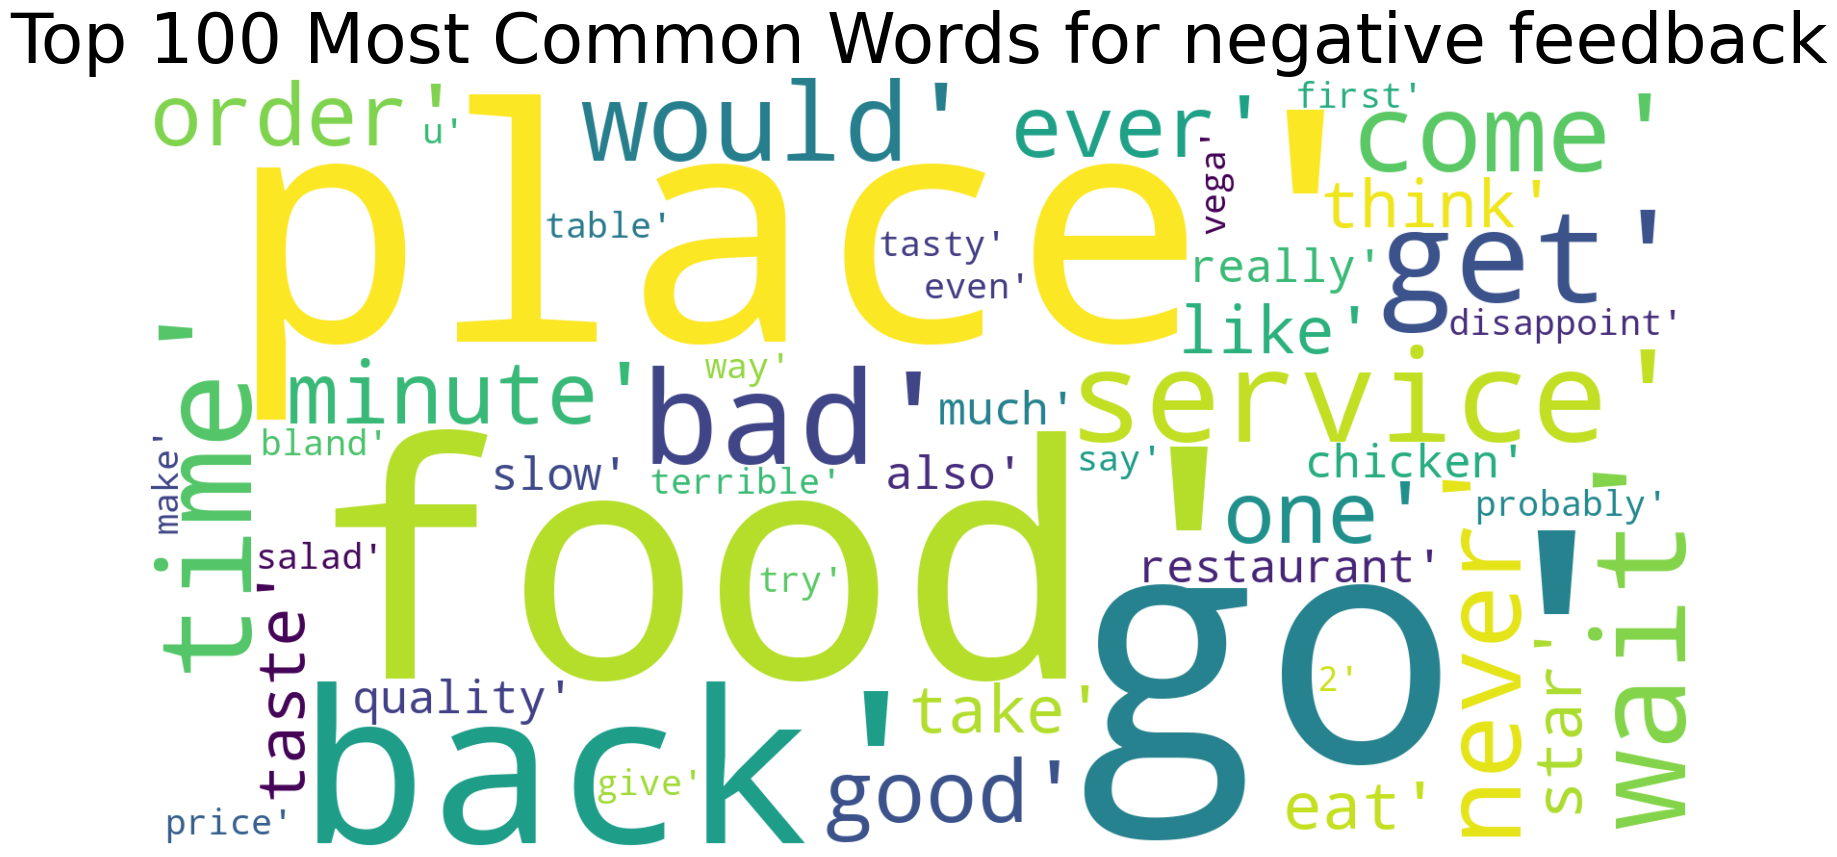

In [88]:
mostcommon = FreqDist(reviews_words).most_common(50)
wordcloud = WordCloud(width=1600, height=800, background_color='white').generate(str(mostcommon))
fig = plt.figure(figsize=(30,10), facecolor='white')
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('Top 100 Most Common Words for negative feedback', fontsize=50)
plt.show()

this code visualizes the most prominent words specifically within the reviews that your sentiment analysis classified as negative, giving you insight into the terms commonly associated with negative experiences.



In [89]:
reviews_data = pd.read_csv("cleaned_reviews_lemmatized_data.csv")


## Tokenize Data

In [90]:
reviews_data['reviews_tokenized'] = reviews_data['reviews_cleaned_lemmatized'].apply(word_tokenize)


In [91]:
data = reviews_data['reviews_tokenized'].values.tolist()
all_reviews_words = list(data)
all_reviews_words[:1][0][:30]

['wow', '...', 'love', 'place']

##Create dictionary and corpus to prepare data for LDA


In [93]:
dictionary = corpora.Dictionary(all_reviews_words)
corpus = [dictionary.doc2bow(words) for words in all_reviews_words]
# View
print(corpus[:1][0][:30])

[(0, 1), (1, 1), (2, 1), (3, 1)]


##Build LDA model


In [96]:
topics = 2
lda_model = gensim.models.LdaMulticore(corpus=corpus,id2word=dictionary, num_topics=topics)
model_result = lda_model[corpus]

print(lda_model.print_topics()[:4])

[(0, '0.021*"food" + 0.020*"good" + 0.016*"place" + 0.016*"great" + 0.012*"service" + 0.008*"time" + 0.007*"like" + 0.006*"get" + 0.006*"go" + 0.006*"never"'), (1, '0.016*"go" + 0.014*"back" + 0.013*"place" + 0.013*"food" + 0.012*"service" + 0.009*"good" + 0.008*"would" + 0.007*"time" + 0.007*"like" + 0.007*"get"')]


In [97]:
print(reviews_data['reviews_tokenized'][0])
model_result[0]

['wow', '...', 'love', 'place']


[(0, 0.8374994), (1, 0.16250058)]

In [100]:
%pip install pyLDAvis

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 22.0 MB/s eta 0:00:00


In [101]:
import pyLDAvis.gensim_models
import pyLDAvis

lda_visuals = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary)
pyLDAvis.display(lda_visuals)

lda_model: This is the trained LDA model object created earlier.

corpus: This is your corpus in bag-of-words format, which was also created earlier.

dictionary: This is the gensim Dictionary object that maps word IDs to words.

This code block generates an interactive visualization of your LDA topic model using the pyLDAvis library. This visualization helps you understand the relationships between the topics and the most relevant words within each topic.

In [102]:
reviews_data['reviews_topics'] = [sorted(lda_model[corpus][i], key=lambda x: x[1], reverse=True)[0][0] for i in range(len(reviews_data['reviews_tokenized']))]


So, for each review, the code gets its topic distribution from the LDA model, finds the topic with the highest proportion, and extracts the ID of that topic. This topic ID is then assigned to the reviews_topics column for that review.

In essence, this code automatically labels each review with the topic that is most strongly associated with it according to the LDA model.

In [103]:
reviews_data['reviews_topics'].value_counts()


,count
reviews_topics,
0,498
1,401


this code gives you a summary of how many reviews fall into each of the topics identified by the LDA model, providing a quick overview of the distribution of topics across your dataset.